In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv("bigmart_data.csv")

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
df['Outlet_Size']=df['Outlet_Size'].fillna('Medium')

In [11]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

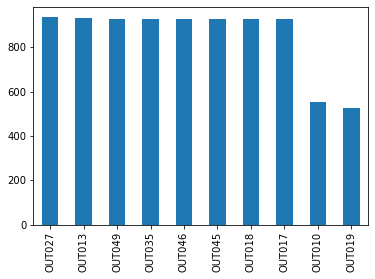

In [12]:
df.Outlet_Identifier.value_counts().plot(kind = "bar")

In [13]:
df['Outlet_Identifier'].max()

'OUT049'

In [14]:
multiple_grouping=df.groupby(["Item_Type","Outlet_Identifier"])

In [15]:
multiple_grouping.first()

Item_Identifier  Item_Weight Item_Fat_Content  \
Item_Type     Outlet_Identifier                                                 
Baking Goods  OUT010                      FDF24       15.500          Regular   
              OUT013                      FDL12       15.850          Regular   
              OUT017                      FDC60        5.425          Regular   
              OUT018                      FDP36       10.395          Regular   
              OUT019                      FDC37       12.600          Low Fat   
...                                         ...          ...              ...   
Starchy Foods OUT027                      FDH35       12.600          Low Fat   
              OUT035                      FDB11       16.000          Low Fat   
              OUT045                      FDH35       18.250          Low Fat   
              OUT046                      FDG35       21.200          Regular   
              OUT049                      FDB11       16.000          Low Fat   

                                 Item_Visibility  Item_MRP  \
Item_Type     Outlet_Identifier                              
Baking Goods  OUT010                    0.042465   81.5934   
              OUT013                    0.121532   59.2220   
              OUT017                    0.115120   88.3514   
              OUT018                    0.000000   51.4008   
              OUT019                    0.057557  107.6938   
...                                          ...       ...   
Starchy Foods OUT027                    0.059957  165.4526   
              OUT035                    0.060837  226.8404   
              OUT045                    0.000000  164.7526   
              OUT046                    0.007041  173.5738   
              OUT049                    0.060943  225.6404   

                                 Outlet_Establishment_Year Outlet_Size  \
Item_Type     Outlet_Identifier                                          
Baking Goods  OUT010                                  1998      Medium   
              OUT013                                  1987        High   
              OUT017                                  2007      Medium   
              OUT018                                  2009      Medium   
              OUT019                                  1985       Small   
...                                                    ...         ...   
Starchy Foods OUT027                                  1985      Medium   
              OUT035                                  2004       Small   
              OUT045                                  2002      Medium   
              OUT046                                  1997       Small   
              OUT049                                  1999      Medium   

                                Outlet_Location_Type        Outlet_Type  \
Item_Type     Outlet_Identifier                                           
Baking Goods  OUT010                          Tier 3      Grocery Store   
              OUT013                          Tier 3  Supermarket Type1   
              OUT017                          Tier 2  Supermarket Type1   
              OUT018                          Tier 3  Supermarket Type2   
              OUT019                          Tier 1      Grocery Store   
...                                              ...                ...   
Starchy Foods OUT027                          Tier 3  Supermarket Type3   
              OUT035                          Tier 2  Supermarket Type1   
              OUT045                          Tier 2  Supermarket Type1   
              OUT046                          Tier 1  Supermarket Type1   
              OUT049                          Tier 1  Supermarket Type1   

                                 Item_Outlet_Sales  
Item_Type     Outlet_Identifier                     
Baking Goods  OUT010                      327.5736  
              OUT013                      599.2200  
              OUT017

In [16]:
df.drop(columns=["Item_Identifier"])

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
dfnew=pd.DataFrame(data=df,columns=["Item_Type","Item_MRP","Outlet_Identifier","Item_Outlet_Sales","Outlet_Location_Type","Outlet_Size","Outlet_Type","Item_Weight"])

In [18]:
dfnew

,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Weight
0,Dairy,249.8092,OUT049,3735.1380,Tier 1,Medium,Supermarket Type1,9.300
1,Soft Drinks,48.2692,OUT018,443.4228,Tier 3,Medium,Supermarket Type2,5.920
2,Meat,141.6180,OUT049,2097.2700,Tier 1,Medium,Supermarket Type1,17.500
3,Fruits and Vegetables,182.0950,OUT010,732.3800,Tier 3,Medium,Grocery Store,19.200
4,Household,53.8614,OUT013,994.7052,Tier 3,High,Supermarket Type1,8.930
...,...,...,...,...,...,...,...,...
8518,Snack Foods,214.5218,OUT013,2778.3834,Tier 3,High,Supermarket Type1,6.865
8519,Baking Goods,108.1570,OUT045,549.2850,Tier 2,Medium,Supermarket Type1,8.380
8520,Health and Hygiene,85.1224,OUT035,1193.1136,Tier 2,Small,Supermarket Type1,10.600
8521,Snack Foods,103.1332,OUT018,1845.5976,Tier 3,Medium,Supermarket Type2,7.210


In [19]:
from sklearn.preprocessing import  LabelEncoder

label_quality = LabelEncoder()
dfnew['Item_Type'] = label_quality.fit_transform(dfnew['Item_Type'])

In [20]:
label_quality = LabelEncoder()

dfnew['Outlet_Type'] = label_quality.fit_transform(dfnew['Outlet_Type'])

In [21]:
from sklearn.preprocessing import  LabelEncoder

label_quality = LabelEncoder()
dfnew['Outlet_Identifier'] = label_quality.fit_transform(dfnew['Outlet_Identifier'])

In [22]:
dfnew.head()

,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Weight
0,4,249.8092,9,3735.1380,Tier 1,Medium,1,9.30
1,14,48.2692,3,443.4228,Tier 3,Medium,2,5.92
2,10,141.6180,9,2097.2700,Tier 1,Medium,1,17.50
3,6,182.0950,0,732.3800,Tier 3,Medium,0,19.20
4,9,53.8614,1,994.7052,Tier 3,High,1,8.93


In [23]:
def encode(city):
    if city=="Tier 1":
        label=0
    elif city=="Tier 2":
        label=1
    else:
        label=2
    return label

dfnew["encode_city"]=dfnew["Outlet_Location_Type"].apply(encode)
dfnew["encode_city"]

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: encode_city, Length: 8523, dtype: int64

In [24]:
dfnew["encode_city"]=dfnew["Outlet_Location_Type"].apply(encode)


In [25]:
def encode(outlet_size):
    if outlet_size=="Low":
        label=0
    elif outlet_size=="Medium":
        label=1
    else:
        label=2
    return label

dfnew["encode_outlet_size"]=dfnew["Outlet_Size"].apply(encode)


In [26]:
dfnew.head()

,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Location_Type,Outlet_Size,Outlet_Type,Item_Weight,encode_city,encode_outlet_size
0,4,249.8092,9,3735.1380,Tier 1,Medium,1,9.30,0,1
1,14,48.2692,3,443.4228,Tier 3,Medium,2,5.92,2,1
2,10,141.6180,9,2097.2700,Tier 1,Medium,1,17.50,0,1
3,6,182.0950,0,732.3800,Tier 3,Medium,0,19.20,2,1
4,9,53.8614,1,994.7052,Tier 3,High,1,8.93,2,2


In [27]:
corr_matrix=dfnew.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=False)
#as per this we are dropping Outlet_Location_Type and Outlet_Size.

Item_Outlet_Sales     1.000000
Item_MRP              0.567574
Outlet_Type           0.401522
Outlet_Identifier     0.162325
encode_city           0.089367
Item_Type             0.017048
Item_Weight           0.009693
encode_outlet_size   -0.075154
Name: Item_Outlet_Sales, dtype: float64

In [28]:
dfnew=pd.DataFrame(data=dfnew,columns=["Item_MRP","Outlet_Identifier","Item_Outlet_Sales"])

C:\Users\Preeti kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


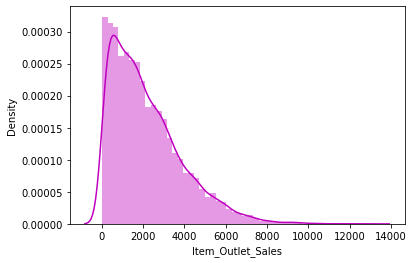

In [29]:
sns.distplot(df.Item_Outlet_Sales, color = "m")
plt.show()

In [30]:
df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

C:\Users\Preeti kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


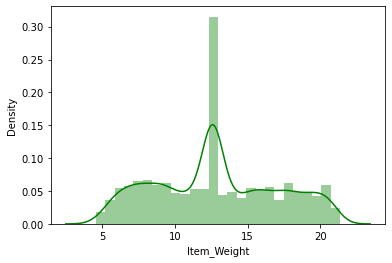

In [31]:
sns.distplot(df.Item_Weight.dropna(), color = "g");

C:\Users\Preeti kumari\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


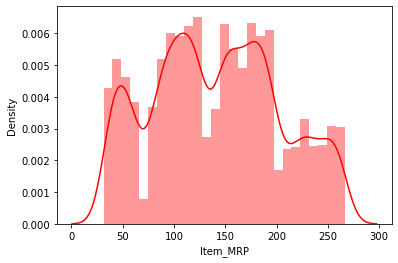

In [32]:
sns.distplot(df.Item_MRP, color = "r");

In [33]:
 df['Item_Fat_Content'].replace(['reg'],'Regular',inplace=True)
 


In [34]:
df['Item_Fat_Content'].replace(['LF',"low fat"],'Low Fat',inplace=True)

In [35]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

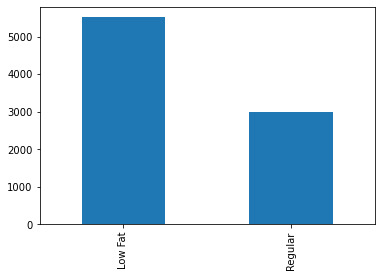

In [36]:
df.Item_Fat_Content.value_counts().plot(kind = "bar")

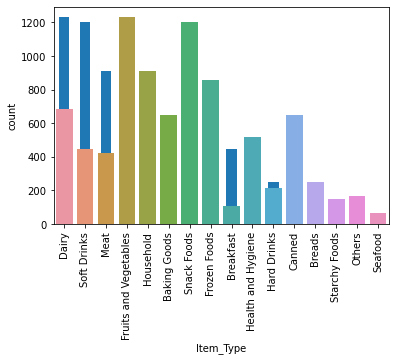

In [37]:
df.Item_Type.value_counts().plot(kind = "bar")
sns.countplot(x = "Item_Type", data = df)
plt.xticks(rotation = 90)
plt.show()

In [38]:
dfnew.skew()
#item outlet sales is postivly skewed

Item_MRP             0.127202
Outlet_Identifier   -0.059861
Item_Outlet_Sales    1.177531
dtype: float64

In [39]:
from scipy import stats
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dfnew))
threshold=3
dfnew =dfnew[(z < 3).all(axis=1)]

In [40]:
dfnew.skew()
#after outlier

Item_MRP             0.137074
Outlet_Identifier   -0.057465
Item_Outlet_Sales    0.885157
dtype: float64

In [41]:
dfnew

,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
0,249.8092,9,3735.1380
1,48.2692,3,443.4228
2,141.6180,9,2097.2700
3,182.0950,0,732.3800
4,53.8614,1,994.7052
...,...,...,...
8518,214.5218,1,2778.3834
8519,108.1570,7,549.2850
8520,85.1224,6,1193.1136
8521,103.1332,3,1845.5976


In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [43]:
x=np.array(dfnew.drop("Item_Outlet_Sales",axis=1))

In [44]:
y=np.array(dfnew["Item_Outlet_Sales"])

In [45]:
x.shape

(8433, 2)

In [46]:
y.shape

(8433,)

In [47]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
max_r_score=0
for r_state in range(42,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =r_state)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2_ score corresponding to ",final_r_state,"is",max_r_score)

max r2_ score corresponding to  99 is 0.3790184122790379


In [48]:

print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE is: 1286.2472719288153


In [49]:
cross_val_score(lr,x,y,cv=10,scoring="r2").mean()

0.34563942036917394

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=99)
regressor.fit(x_train,y_train)
y_pred_=regressor.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
cross_val_score(regressor, x, y, cv=10,scoring="r2").mean()
r2_scr                   

0.3790184122790379

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 5}

In [56]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)  #fit the model
pred=knn.predict(x_test) #make prediction on test set
error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE value  is:', error)
print("r2_score",r2_score(y_test,pred))
#using knn regressor

RMSE value  is: 1209.5713880706855
r2_score 0.4508477080240214


In [57]:
import joblib
joblib.dump(knn,"knn_bigmart.pkl")

['knn_bigmart.pkl']